In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
gcc = pd.read_csv("gcc.csv")

In [3]:
gcc

,T,H
0,360.90,1506.58129
1,252.50,2199.36569
2,169.73,2212.19504
3,168.82,2086.07450
4,162.80,1406.40446
5,154.30,475.80746
6,152.48,353.11944
7,149.04,0.00000
8,136.50,334.90578
9,86.50,1328.70578


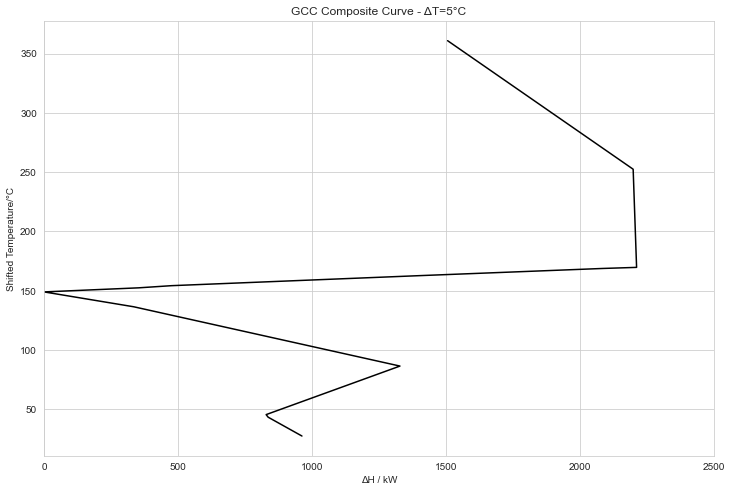

In [4]:
fig,ax = plt.subplots(figsize = (12,8))


plt.plot(gcc["H"],gcc["T"],c="black")

plt.xlim(0,2500)
plt.xlabel("ΔH / kW")
plt.ylabel("Shifted Temperature/°C")
plt.title(f"GCC Composite Curve - ΔT=5°C")
plt.savefig("gcc/base.png")

In [5]:
def get_polygon_center(arr: np.array):
    x_min, x_max = arr[:,0].min(), arr[:,0].max()
    y_min, y_max = arr[:,1].min(), arr[:,1].max()
    return (x_min+x_max)/2, (y_min+y_max)/2 

In [6]:
t100 = [
    [0, 48.4],
    [2008.364, 50.89],
    [2008.364, 158.71],
    [1553.627, 158.71],
    [0, 163.24],
    
]
t100 = np.array(t100)

t101 = [
    [0, 162.78],
    [2346.8132, 160.87],
    [2346.8132, 131.09],
    [2238.7037,131.09],
    [0, 128.54],
]
t101 = np.array(t101)

cols = [t100,t101]
names = ["T-100","T-101"]

No handles with labels found to put in legend.


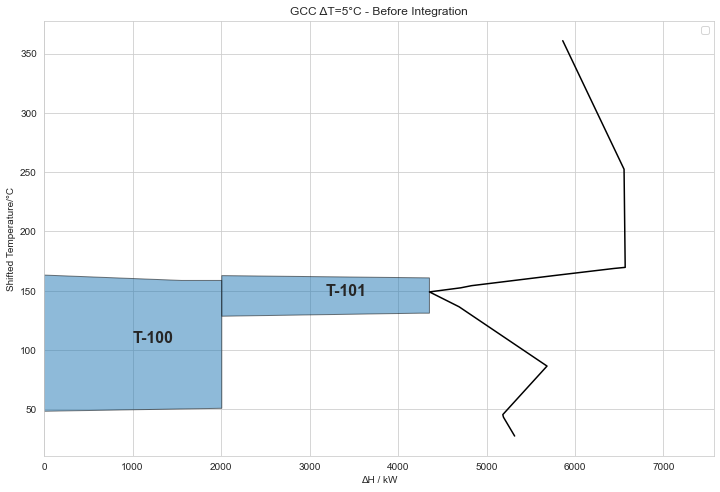

In [7]:
fig,ax = plt.subplots(figsize = (12,8))
curr_h = 0

for col,name in zip(cols,names):
    col_h = col[:,0].max()
    col_plot = col.copy()

    col_plot[:,0] += curr_h
    col_poly = mpatches.Polygon(
        col_plot, edgecolor="black",facecolor="tab:blue",alpha=0.5
    )
    col_center = get_polygon_center(col_plot)
    plt.annotate(name,col_center,fontsize=16, fontweight="bold")
    curr_h += col_h
    ax.add_patch(col_poly)




gcc["H_plot"] = gcc["H"] + curr_h
plt.plot(gcc["H_plot"],gcc["T"],c="black")

plt.xlim(0,gcc["H_plot"].max()+1000)
plt.xlabel("ΔH / kW")
plt.ylabel("Shifted Temperature/°C")
plt.title(f"GCC ΔT=5°C - Before Integration")
plt.savefig("gcc/base.png")
plt.legend()

No handles with labels found to put in legend.


[array([[   0.   ,   48.4  ],
       [2008.364,   50.89 ],
       [2008.364,  158.71 ],
       [1553.627,  158.71 ],
       [   0.   ,  163.24 ],
       [   0.   ,   48.4  ]]), array([[1874.559 ,  202.78  ],
       [4221.3722,  200.87  ],
       [4221.3722,  171.09  ],
       [4113.2627,  171.09  ],
       [1874.559 ,  168.54  ],
       [1874.559 ,  202.78  ]])]
0     3514.94529
1     4207.72969
2     4220.55904
3     4094.43850
4     3414.76846
5     2484.17146
6     2361.48344
7     2008.36400
8     2343.26978
9     3337.06978
10    2837.43727
11    2844.85867
12    2971.15237
Name: H_plot, dtype: float64


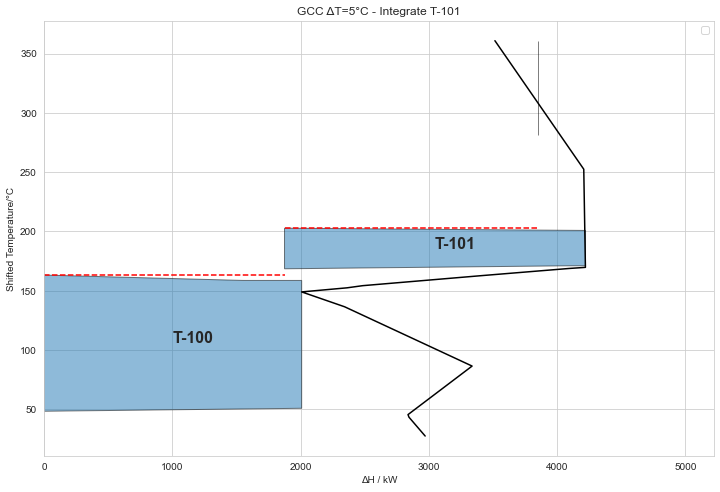

In [55]:
fig,ax = plt.subplots(figsize = (12,8))
curr_h = 0
offsets = [
    [0,0],
    [1874.559,40]
]
for col,name,offset in zip(cols,names,offsets):
    col_h = col[:,0].max()
    col_plot = col.copy()

    # col_plot[:,0] += curr_h
    col_plot[:,0] += offset[0]
    col_plot[:,1] += offset[1]
    col_poly = mpatches.Polygon(
        col_plot, edgecolor="black",facecolor="tab:blue",alpha=0.5
    )
    col_center = get_polygon_center(col_plot)
    plt.annotate(name,col_center,fontsize=16, fontweight="bold")
    ax.add_patch(col_poly)
print([p.xy for p in ax.patches])
ax.hlines(202.78,xmin=1874.559,xmax=3853.394,linestyles="--",color="red")
ax.hlines(163.24,xmin=0,xmax=1874.559,linestyles="--",color="red")

ax.vlines(3853.394,ymin=281.62,ymax=360.9, color="black",lw=0.5)


gcc["H_plot"] = gcc["H"] + 2008.364
plt.plot(gcc["H_plot"],gcc["T"],c="black")
print(gcc["H_plot"])

plt.xlim(0,gcc["H_plot"].max()+1000)
plt.xlabel("ΔH / kW")
plt.ylabel("Shifted Temperature/°C")
plt.title(f"GCC ΔT=5°C - Integrate T-101")
plt.savefig("gcc/base.png")
plt.legend()

No handles with labels found to put in legend.


0     3853.39449
1     4546.17889
2     4559.00824
3     4432.88770
4     3753.21766
5     2822.62066
6     2699.93264
7     2346.81320
8     2681.71898
9     3675.51898
10    3175.88647
11    3183.30787
12    3309.60157
Name: H_plot, dtype: float64


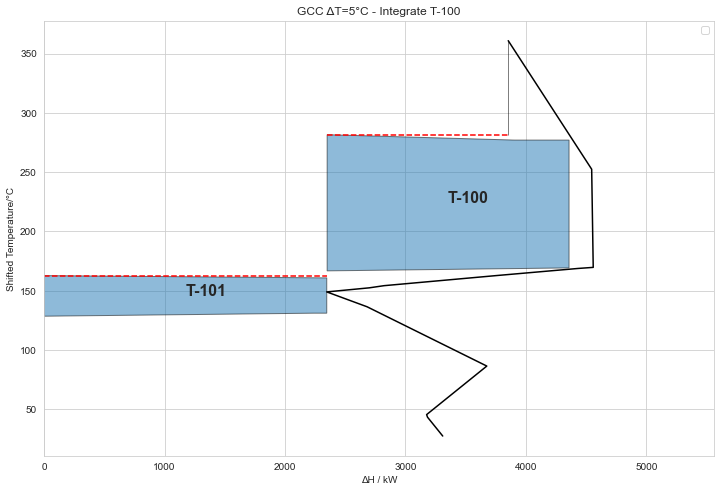

In [42]:
fig,ax = plt.subplots(figsize = (12,8))
curr_h = 0
offsets = [
    [2350,118.38],
    [0,0]
]
for col,name,offset in zip(cols,names,offsets):
    col_h = col[:,0].max()
    col_plot = col.copy()

    # col_plot[:,0] += curr_h
    col_plot[:,0] += offset[0]
    col_plot[:,1] += offset[1]
    col_poly = mpatches.Polygon(
        col_plot, edgecolor="black",facecolor="tab:blue",alpha=0.5
    )
    col_center = get_polygon_center(col_plot)
    plt.annotate(name,col_center,fontsize=16, fontweight="bold")
    ax.add_patch(col_poly)




gcc["H_plot"] = gcc["H"] + 2346.8132
plt.plot(gcc["H_plot"],gcc["T"],c="black")
ax.hlines(281.62,xmin=2350,xmax=3853.394,linestyles="--",color="red")
ax.hlines(162.78,xmin=0,xmax=2350,linestyles="--",color="red")

ax.vlines(3853.394,ymin=281.62,ymax=360.9, color="black",lw=0.5)
# print([p.xy for p in ax.patches])
print(gcc["H_plot"])
plt.xlim(0,gcc["H_plot"].max()+1000)
plt.xlabel("ΔH / kW")
plt.ylabel("Shifted Temperature/°C")
plt.title(f"GCC ΔT=5°C - Integrate T-100")
plt.savefig("gcc/base.png")
plt.legend()

No handles with labels found to put in legend.


0     1727.94529
1     2420.72969
2     2433.55904
3     2307.43850
4     1627.76846
5      697.17146
6      574.48344
7      221.36400
8      556.26978
9     1550.06978
10    1050.43727
11    1057.85867
12    1184.15237
Name: H_plot, dtype: float64


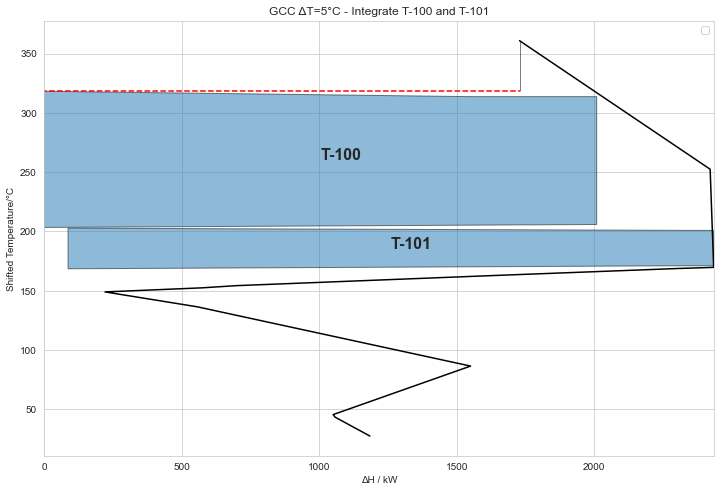

In [44]:
fig,ax = plt.subplots(figsize = (12,8))
curr_h = 0
offsets = [
    [0,155],
    [87.059,40]
]
for col,name,offset in zip(cols,names,offsets):
    col_h = col[:,0].max()
    col_plot = col.copy()

    # col_plot[:,0] += curr_h
    col_plot[:,0] += offset[0]
    col_plot[:,1] += offset[1]
    col_poly = mpatches.Polygon(
        col_plot, edgecolor="black",facecolor="tab:blue",alpha=0.5
    )
    col_center = get_polygon_center(col_plot)
    plt.annotate(name,col_center,fontsize=16, fontweight="bold")
    ax.add_patch(col_poly)


gcc["H_plot"] = gcc["H"] + 221.364
plt.plot(gcc["H_plot"],gcc["T"],c="black")

ax.hlines(318.24,xmin=-500,xmax=1729.94529,linestyles="--",color="red")
ax.vlines(1729.94529,ymin=318.24,ymax=360.9, color="black",lw=0.5)
print(gcc["H_plot"])
# print([p.xy for p in ax.patches])
plt.xlim(0,gcc["H_plot"].max())
plt.xlabel("ΔH / kW")
plt.ylabel("Shifted Temperature/°C")
plt.title(f"GCC ΔT=5°C - Integrate T-100 and T-101")
plt.savefig("gcc/base.png")
plt.legend()

In [46]:
t100

array([[   0.   ,   48.4  ],
       [2008.364,   50.89 ],
       [2008.364,  158.71 ],
       [1553.627,  158.71 ],
       [   0.   ,  163.24 ]])

In [81]:
def extract(name):
    slc = df[df["UEN"] == "NAME"].copy()

    if all_individual:
        local_shares = slc[slc["is_loc"] == 1]["Shares"].sum()
        total_shares = slc["Shares"].sum()
        return local_shares/total_shares
    else:
        local_shares = slc[slc["is_loc"] == 1]["Shares"].sum()
        total_shares = slc["Shares"].sum()
        # foreign_shares = slc[slc["is_loc"] == 0].sum()
    
        comp_slc = slc.groupby("CompanyProfileUEN").sum()["Shares"]
        local_company_shares_ls = []
        for _,row in comp_slc.iterrows():
            company_uen = row["CompanyProfileUEN"]
            company_shares = row["Shares"]
            local_perc = extract(company_uen)

            local_company_shares_ls.append(local_perc*company_shares)
        local_company_shares =  sum(local_company_shares_ls)
        return (local_shares + local_company_shares)/total_shares